# Exercise 2: Isomap
### Due June 25 at 14:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg 

from sklearn.metrics.pairwise import euclidean_distances
import networkx as nx

np.random.seed(42)

### a) Implement Isomap

You have already implemented MDS for last week's assignment. You can use either version for Isomap: yours or the one below.

**Notice** that the `D` inputs in `MSD` and `Isomap` represent two different distance matrices...

In [2]:
def MDS(D, d):
    """
    Classic Multidimensional Scaling 
    
    Parameters
    ---------
    D: numpy array, shape (n, n) 
       Pairwise distances of n objects.
    d: int
       Embedding dimensionality
    
    Returns
    -------
    X_embedded: numpy array, shape (n, d)
        Coordinates of the embedded objects.
    """
    n = len(D)
    
    S = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            S[i,j] = (D[0,i]**2 + D[0,j]**2 - D[i,j]**2) / 2
            
    W, V = np.linalg.eig(S)
    L = np.diag(W)

    X_embedded = V[:, :d] @ np.sqrt(L[:d, :d])
    
    return np.real(X_embedded)

Hint: test your function on some synthetic input to check if it works, e.g.

`D = euclidean_distances(np.random.normal(size=(10, 3)))`

In [3]:
def Isomap(D, k, d):
    # D is the distance matrix in original space (construct graph using this matrix and then calculate the distance matrix)
    #k is for contructing the KNN graph, using the distance matrix
    # d is the lower dimension
    G = nx.Graph()
    index_sort = D.argsort(axis = 1)
    n = D.shape[0]
    for i in range(n):
        neighbours = index_sort[i][1:k+1]
        for j in neighbours:
            G.add_edge(i,j,weight=D[i][j])
    dist_matrix = nx.floyd_warshall_numpy(G)
    
    return MDS(dist_matrix, d)
    
    

### b) Isomap and USPS 

In [4]:
train_df = pd.read_csv('USPS.csv', sep='\t',)
X = train_df.drop(['Label'], axis=1).values
y = train_df['Label'].values
idx = np.any([y == 0, y == 3, y == 6, y == 9], axis=0)
X = X[idx]
y = y[idx]

print(f'There are {X.shape[0]} data points, each of dimension {X[0].shape}')

There are 400 data points, each of dimension (256,)


Embed the data points with `d=2` and `k=5, 10, 50`. Plot the results.

In [5]:
%%time
ks = [5, 20, 50]
low_dim = [Isomap(euclidean_distances(X),k,2) for k in ks]

CPU times: user 4.37 s, sys: 51.2 ms, total: 4.42 s
Wall time: 2.21 s


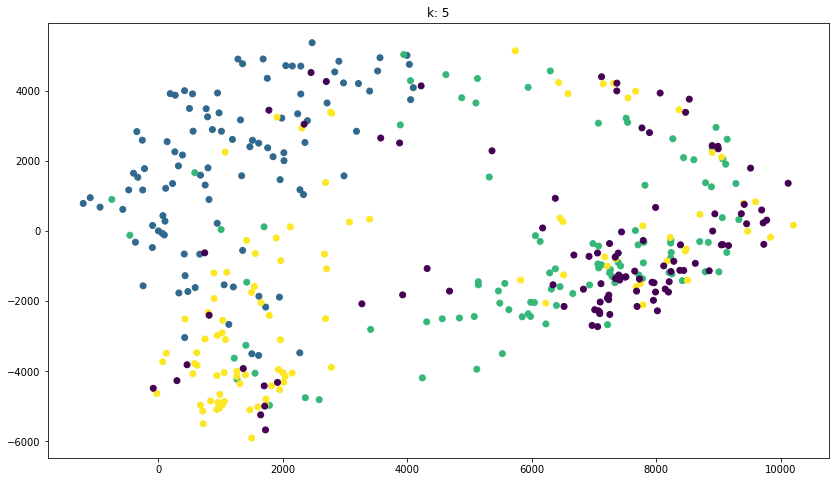

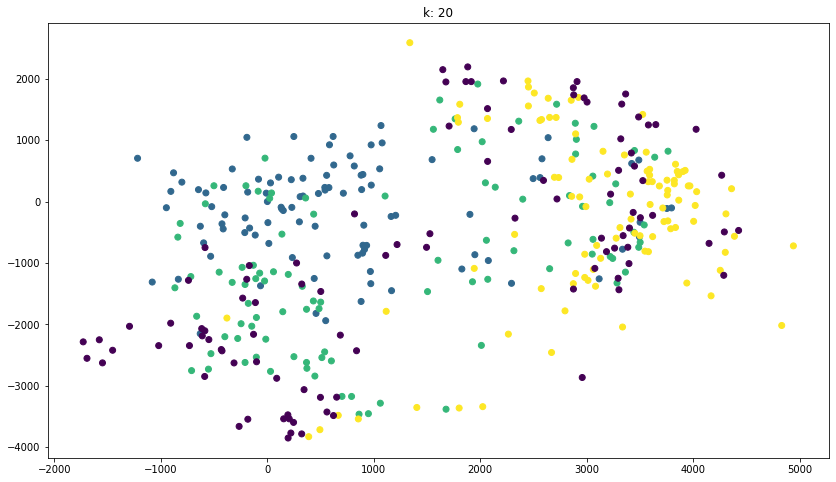

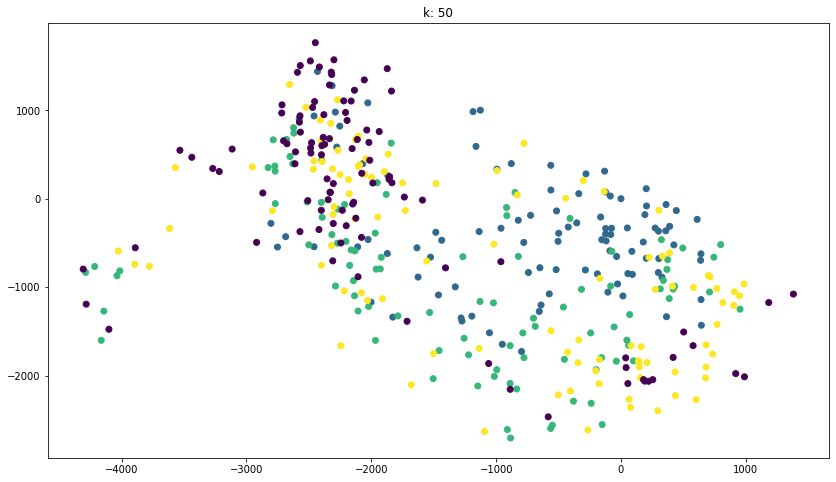

In [6]:
for k, isomap in enumerate(low_dim):
    plt.figure(figsize=(14,8))
    plt.scatter(isomap[:,0], isomap[:,1], c=y)
    plt.title(f"k: {ks[k]}")
    plt.show()

What happens with `d=1`? 

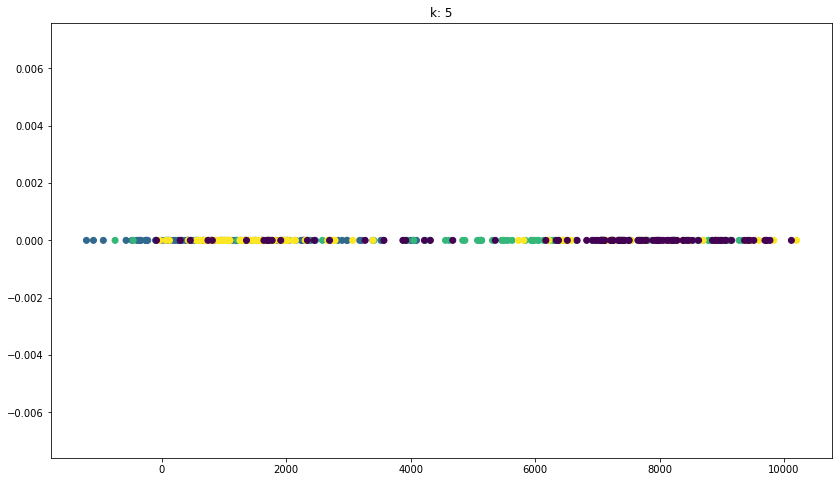

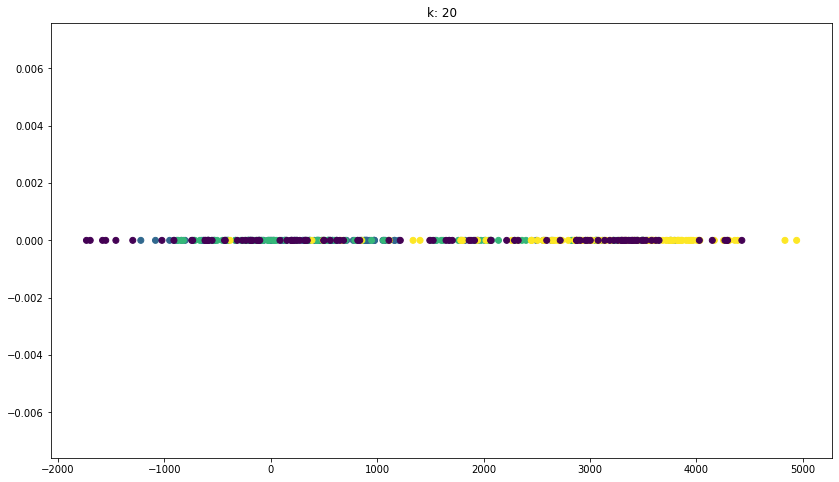

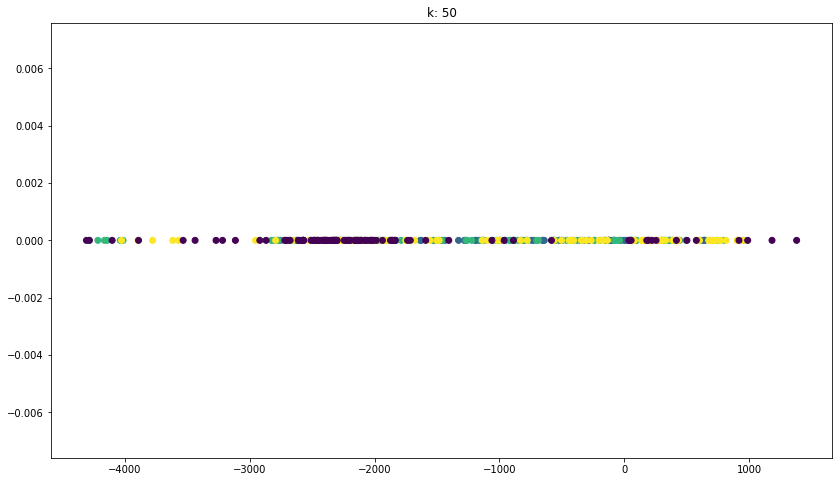

CPU times: user 5.45 s, sys: 83.9 ms, total: 5.53 s
Wall time: 2.73 s


In [7]:
%%time
low_dim_1 = [Isomap(euclidean_distances(X),k,1) for k in ks]
for k, isomap in enumerate(low_dim_1):
    plt.figure(figsize=(14, 8))
    plt.scatter(isomap[:, 0], np.zeros(isomap.shape), c=y)
    plt.title(f"k: {ks[k]}")
    plt.show()

- <font color="blue">In our opinion, the most reasonable embedding is the 2-dimensional embedding when $k = 5$</font>
- <font color="blue">When $d=1$, the map is terribly bad and the "manifold" is completely irrecoverable/uninformative.</font>